# Case Study - World Happiness Analysis Project

## Table of Content

1. Importing Libraries
2. Importing Data
3. Elbow Technique
4. K-mean Clustering
5. Grouping


# 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Import the kmeans algorithm from scikit-learn
import pylab as pl #Pylab is a convenience module that bulk imports matplotlib

In [2]:
# This option ensures the charts created  are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

# 02a. Importing Data - 2016 Data

In [3]:
# Path & list setup
path = r'/Users/ChuahLH/Desktop/Data Science/Data Immersion/Achievement 6/World Happiness Analysis'

In [4]:
# Import 2015.csv dataset into notebook using the os library and the vars_list
df_2016 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', '2016_clean_data.csv'), index_col = False)

In [5]:
df_2016.head()

,Unnamed: 0,Country,Region,happiness_rank_2016,happiness_score_2016,lower_confidence_2016,upper_confidence_2016,economy_gdp_2016,family_2016,health_life_expectancy_2016,freedom_2016,trust_2016,generosity_2016,dystopia_residual_2016
0,0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [6]:
# Drop the redundant columns
df_2016 = df_2016.drop(['Unnamed: 0'],axis = 1)

In [7]:
df_2016.shape

(157, 13)

In [8]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      157 non-null    object 
 1   Region                       157 non-null    object 
 2   happiness_rank_2016          157 non-null    int64  
 3   happiness_score_2016         157 non-null    float64
 4   lower_confidence_2016        157 non-null    float64
 5   upper_confidence_2016        157 non-null    float64
 6   economy_gdp_2016             157 non-null    float64
 7   family_2016                  157 non-null    float64
 8   health_life_expectancy_2016  157 non-null    float64
 9   freedom_2016                 157 non-null    float64
 10  trust_2016                   157 non-null    float64
 11  generosity_2016              157 non-null    float64
 12  dystopia_residual_2016       157 non-null    float64
dtypes: float64(10), int6

### Note: Data Wrangling, Subsetting and Consistency Check had been previously carried out in Exercise 6.1

In [9]:
# There are mixed of categorical data and numerical data. Just keep the numerical data in this exercise.
df_2016_clean = df_2016.drop(columns =['Country','Region','happiness_rank_2016'])

In [10]:
df_2016_clean

,happiness_score_2016,lower_confidence_2016,upper_confidence_2016,economy_gdp_2016,family_2016,health_life_expectancy_2016,freedom_2016,trust_2016,generosity_2016,dystopia_residual_2016
0,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...
152,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


# 03a. Elbow Technique - 2016 Data

In [11]:
# Stating by defining the range of the cluster
num_cl = range(1, 10) 
# Then, defining the k-means cluster in the above range.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [12]:
# Now, create a score for each of the ranges created..
score_2016 = [kmeans[i].fit(df_2016_clean).score(df_2016_clean) for i in range(len(kmeans))] 

In [13]:
score_2016

[-710.174373927651,
 -249.18466718356893,
 -139.83392200573678,
 -106.48751000886696,
 -88.31856550892107,
 -77.03934040649395,
 -68.29663615554935,
 -62.59615515562618,
 -57.38749250618137]

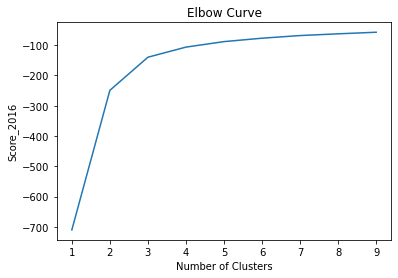

In [14]:
# And finally, create the elbow graph
pl.plot(num_cl,score_2016)
pl.xlabel('Number of Clusters')
pl.ylabel('Score_2016')
pl.title('Elbow Curve')
pl.show()

The elbow, or the breaking point of the curve, is where the curve begins to flatten out. In this case, we can see that it jumps rapidly from one to two then to three on the x-axis, then rises only slowly after three. That the optimal count for this clusters is just about three. Let's take three clusters in this case.  

# 04a. K-Means Clustering - 2016 Data

In [15]:
# Create the object based on the n° of clusters

kmeans = KMeans(n_clusters = 3) 

In [16]:
# Then fit the K-mean into the DF

kmeans.fit(df_2016_clean)

KMeans(n_clusters=3)

In [17]:
df_2016_clean['clusters'] = kmeans.fit_predict(df_2016_clean)

In [18]:
df_2016_clean.head()

,happiness_score_2016,lower_confidence_2016,upper_confidence_2016,economy_gdp_2016,family_2016,health_life_expectancy_2016,freedom_2016,trust_2016,generosity_2016,dystopia_residual_2016,clusters
0,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,0
1,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,0
2,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,0
3,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,0
4,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,0


In [19]:
df_2016_clean['clusters'].value_counts()

2    65
1    49
0    43
Name: clusters, dtype: int64

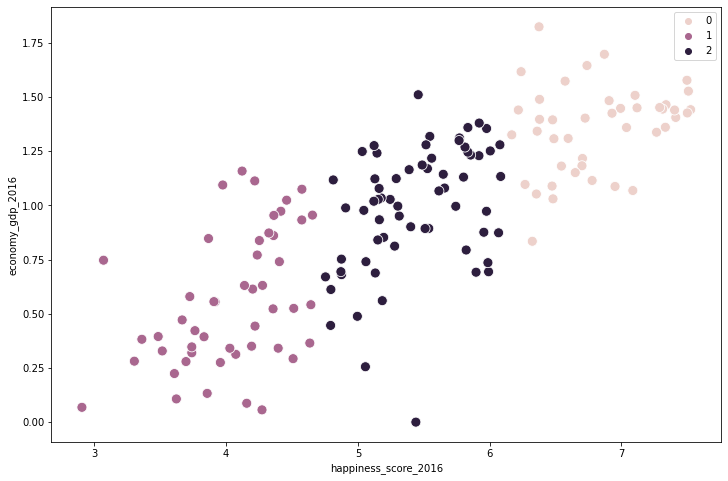

In [20]:
# Plot the clusters for the "happiness_score" and "economy_gdp" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2016_clean['happiness_score_2016'], y=df_2016_clean['economy_gdp_2016'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('happiness_score_2016') # Label x-axis.
plt.ylabel('economy_gdp_2016') # Label y-axis.
plt.show()

The first cluster (0) has the highest economy_gdp and highest happiness score; the second cluster (1) has the lowest economy gdp and lowest happiness score. The third cluster (2) major sat in the middle economy gdp and the happiness score is in middle too. 

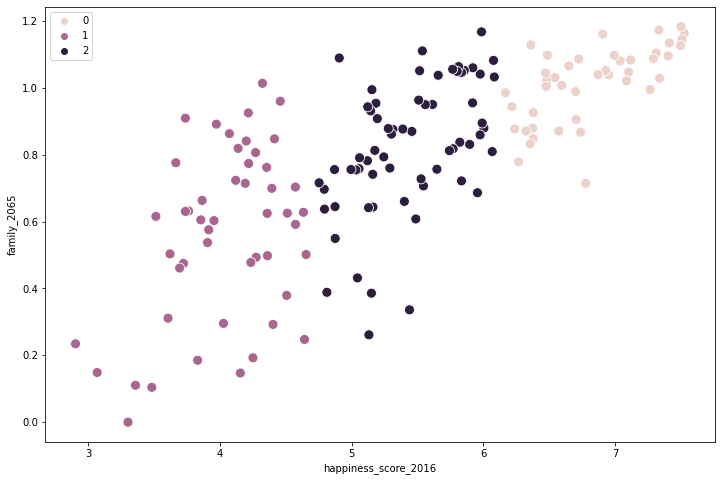

In [21]:
# Plot the clusters for the "happiness_score" and "family" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2016_clean['happiness_score_2016'], y=df_2016_clean['family_2016'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('happiness_score_2016') # Label x-axis.
plt.ylabel('family_2065') # Label y-axis.
plt.show()

The first cluster (0) has the highest family score and the highest happiness score; the second cluster (1) has the lowest family score and lowest happiness score. The third cluster (2) major sat in the middle family score and the happiness score is in middle too. 

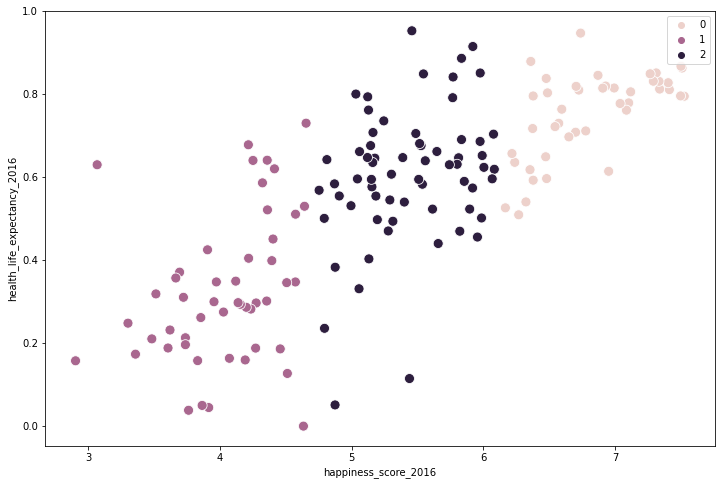

In [22]:
# Plot the clusters for the "happiness_score" and "health_life_expectancy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2016_clean['happiness_score_2016'], y=df_2016_clean['health_life_expectancy_2016'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('happiness_score_2016') # Label x-axis.
plt.ylabel('health_life_expectancy_2016') # Label y-axis.
plt.show()

The first cluster (0) has the highest health life expectancy score and highest happiness score; the second cluster (1) has the lowest health life expectancy score and lowest happiness score. The third cluster (2) major sat in the middle health life expectancy score and the happiness score is in middle too.

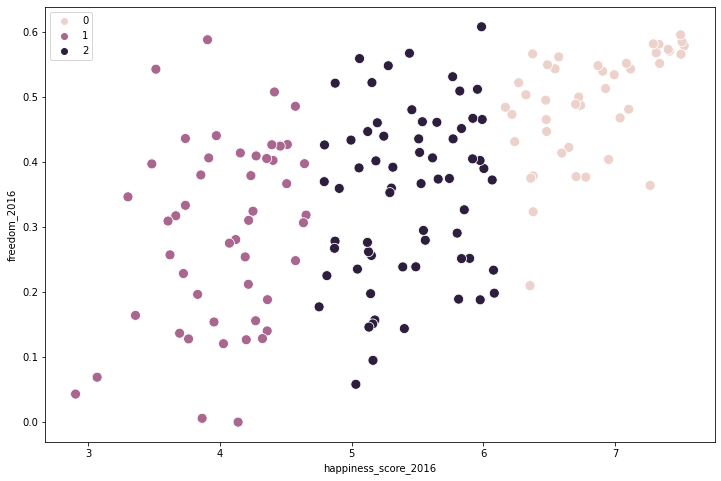

In [23]:
# Plot the clusters for the "happiness_score" and "freedom" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2016_clean['happiness_score_2016'], y=df_2016_clean['freedom_2016'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('happiness_score_2016') # Label x-axis.
plt.ylabel('freedom_2016') # Label y-axis.
plt.show()

The first cluster (0) has the highest freedom score and highest happiness score; the second cluster (1) has the lowest freedom score and lowest happiness score. The third cluster (2) major sat in the middle freedom score and the happiness score is in middle too.

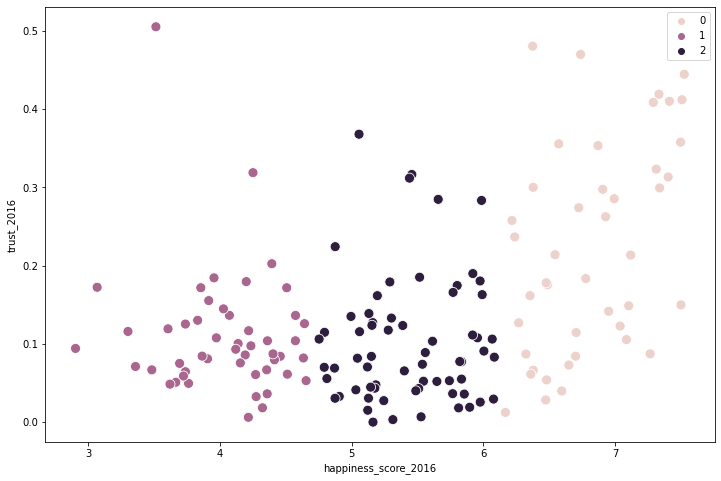

In [24]:
# Plot the clusters for the "happiness_score" and "trust" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2016_clean['happiness_score_2016'], y=df_2016_clean['trust_2016'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('happiness_score_2016') # Label x-axis.
plt.ylabel('trust_2016') # Label y-axis.
plt.show()

The first cluster (0) has the highest trust score and highest happiness score; the second cluster (1) has the lowest trust score and lowest happiness score. The third cluster (2) major sat in the middle trust score and the happiness score is in middle too.

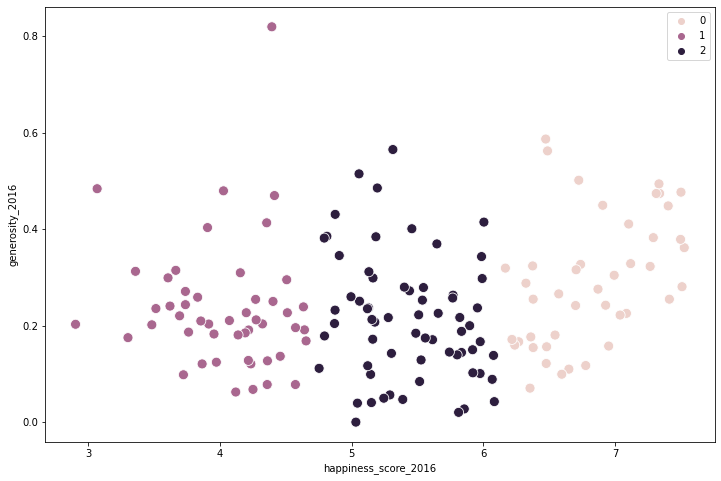

In [27]:
# Plot the clusters for the "happiness_score" and "generosity_2016" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2016_clean['happiness_score_2016'], y=df_2016_clean['generosity_2016'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('happiness_score_2016') # Label x-axis.
plt.ylabel('generosity_2016') # Label y-axis.
plt.show()

The first cluster (0) has the highest generosity score and highest happiness score; the second cluster (1) has the lowest generosity score and lowest happiness score. The third cluster (2) major sat in the middle generosity score and the happiness score is in middle too.

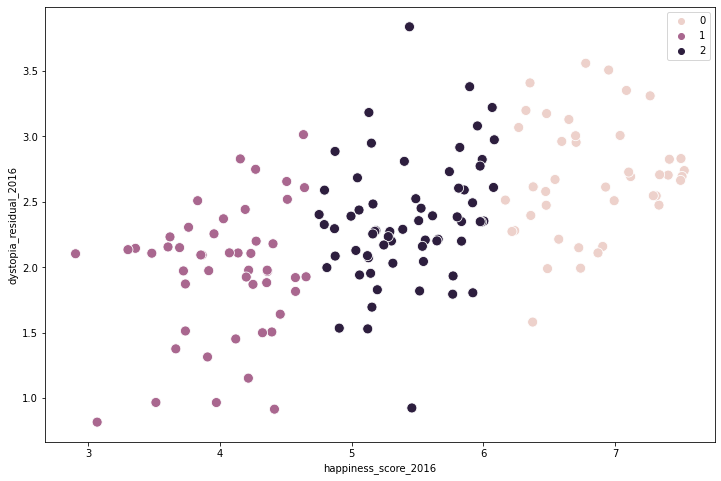

In [28]:
# Plot the clusters for the "happiness_score" and "dystopia_residual" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2016_clean['happiness_score_2016'], y=df_2016_clean['dystopia_residual_2016'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('happiness_score_2016') # Label x-axis.
plt.ylabel('dystopia_residual_2016') # Label y-axis.
plt.show()

The first cluster (0) has the highest dystopia_residual score and highest happiness score; the second cluster (1) has the lowest dystopia_residual score and lowest happiness score. The third cluster (2) major sat in the middle dystopia_residual score and the happiness score is in middle too.

# # 05a. Grouping - 2016 Data

In [29]:
df_2016_clean.loc[df_2016_clean['clusters'] == 2, 'cluster'] = 'purple'
df_2016_clean.loc[df_2016_clean['clusters'] == 1, 'cluster'] = 'whitish purple'
df_2016_clean.loc[df_2016_clean['clusters'] == 0, 'cluster'] = 'whitish pink'

In [31]:
df_2016_clean.groupby('clusters').agg({'happiness_score_2016':['mean', 'median'],
                                       'economy_gdp_2016':['mean', 'median'],
                                       'family_2016':['mean', 'median'], 
                         'health_life_expectancy_2016':['mean', 'median'], 
                         'freedom_2016':['mean', 'median'],
                    'trust_2016':['mean', 'median'],
                    'generosity_2016':['mean', 'median'],
                    'dystopia_residual_2016':['mean', 'median']})

happiness_score_2016        economy_gdp_2016          family_2016  \
                         mean median             mean   median        mean   
clusters                                                                     
0                    6.823186  6.739         1.358809  1.40283    1.015108   
1                    4.042020  4.139         0.553709  0.52267    0.559753   
2                    5.439185  5.440         0.987671  1.02780    0.823399   

                  health_life_expectancy_2016          freedom_2016           \
           median                        mean   median         mean   median   
clusters                                                                       
0         1.03938                    0.754256  0.79565     0.490985  0.50379   
1         0.60530                    0.323299  0.29759     0.292428  0.31056   
2         0.83132                    0.604178  0.61904     0.350842  0.37269   

         trust_2016          generosity_2016          dystopia_residual_2016  \
               mean   median            mean   median                   mean   
clusters                                                                       
0          0.223043  0.21348        0.293917  0.28083               2.687070   
1          0.110066  0.09314        0.234928  0.20970               1.967776   
2          0.101890  0.08170        0.214520  0.20737               2.356717   

                   
           median  
clusters           
0         2.67139  
1         2.09459  
2         2.32694

The cluster 0 has the best stats in almost all categories. The median number of happiness score for this cluster is 6.82, which is significantly larger than the other two. But the dystopia residual for this cluster is high (2.67) compared to the other two cluster. It is contradict to the exercise 6.2 - The highest happiness score country normally has the lowest dystopia residual. 